In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Definisikan variabel input untuk setiap mata kuliah yang relevan
algoritma_dan_pemrograman = ctrl.Antecedent(np.arange(0, 101, 1), 'algoritma_dan_pemrograman')
struktur_data = ctrl.Antecedent(np.arange(0, 101, 1), 'struktur_data')
pemrograman_berorientasi_objek = ctrl.Antecedent(np.arange(0, 101, 1), 'pemrograman_berorientasi_objek')

matematika_diskrit = ctrl.Antecedent(np.arange(0, 101, 1), 'matematika_diskrit')
statistika_dan_probabilitas = ctrl.Antecedent(np.arange(0, 101, 1), 'statistika_dan_probabilitas')
data_mining = ctrl.Antecedent(np.arange(0, 101, 1), 'data_mining')

komunikasi_data_dan_jaringan_komputer = ctrl.Antecedent(np.arange(0, 101, 1), 'komunikasi_data_dan_jaringan_komputer')

sistem_basis_data = ctrl.Antecedent(np.arange(0, 101, 1), 'sistem_basis_data')
pengantar_basis_data = ctrl.Antecedent(np.arange(0, 101, 1), 'pengantar_basis_data')

In [ ]:
# Definisikan variabel output
peminatan = ctrl.Consequent(np.arange(0, 101, 1), 'peminatan')

In [ ]:
# Definisikan fungsi keanggotaan untuk input
for var in [algoritma_dan_pemrograman, struktur_data, pemrograman_berorientasi_objek, matematika_diskrit, statistika_dan_probabilitas, data_mining, komunikasi_data_dan_jaringan_komputer, sistem_basis_data, pengantar_basis_data]:
    var['rendah'] = fuzz.trimf(var.universe, [0, 0, 65])
    var['sedang'] = fuzz.trimf(var.universe, [50, 65, 80])
    var['tinggi'] = fuzz.trimf(var.universe, [65, 100, 100])

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


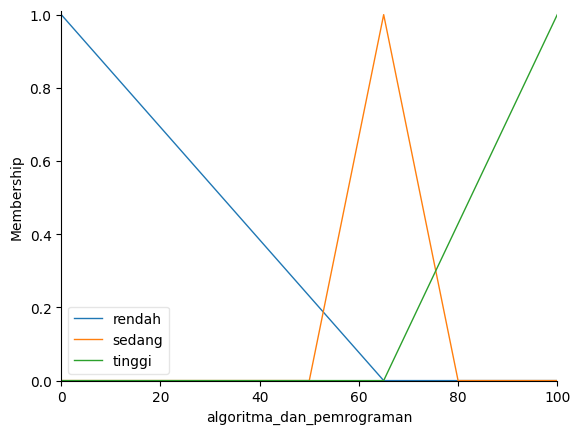

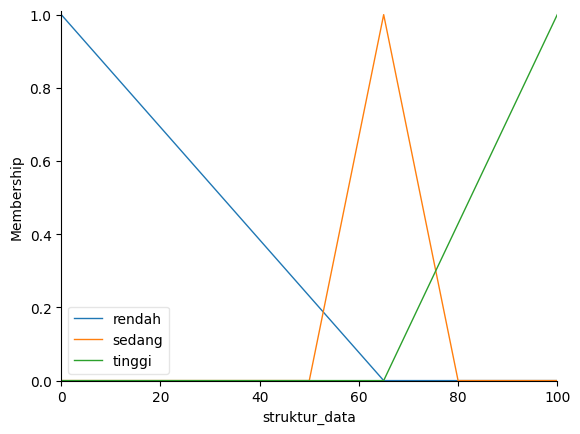

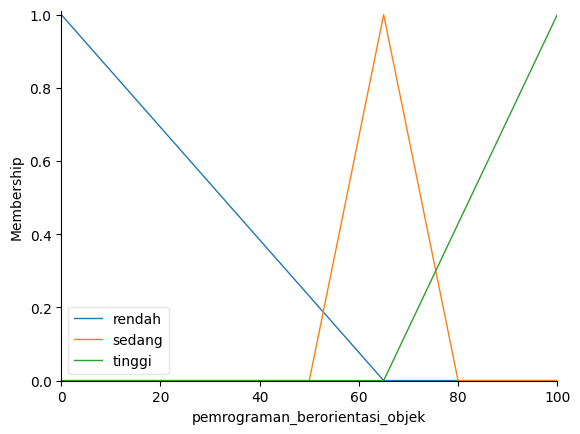

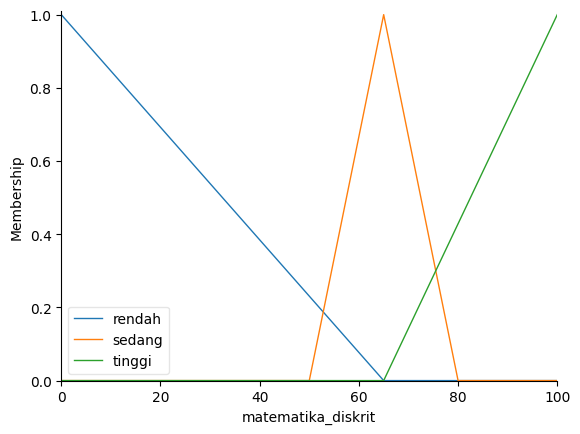

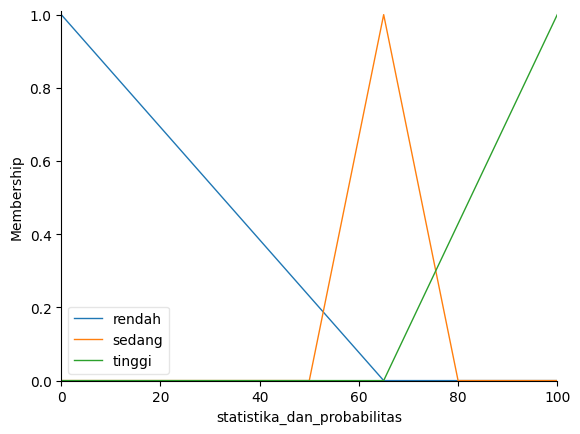

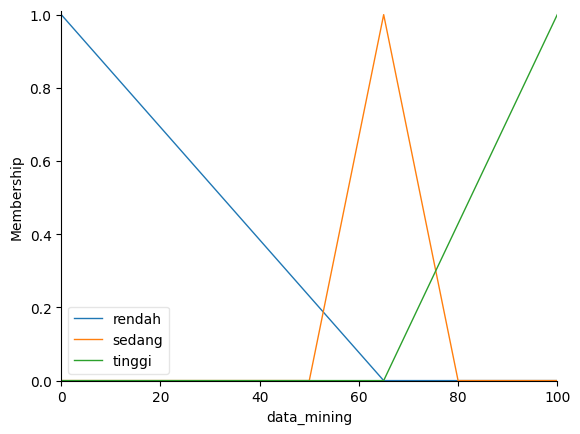

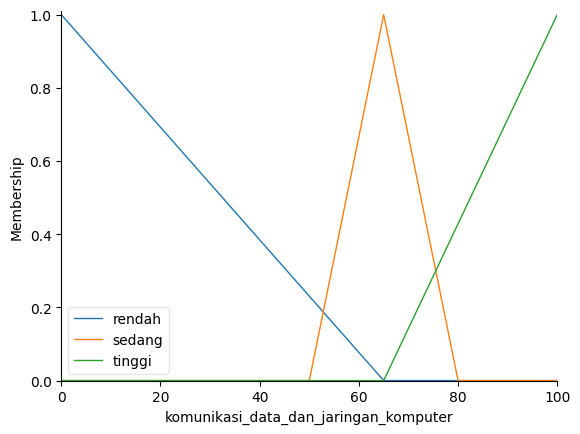

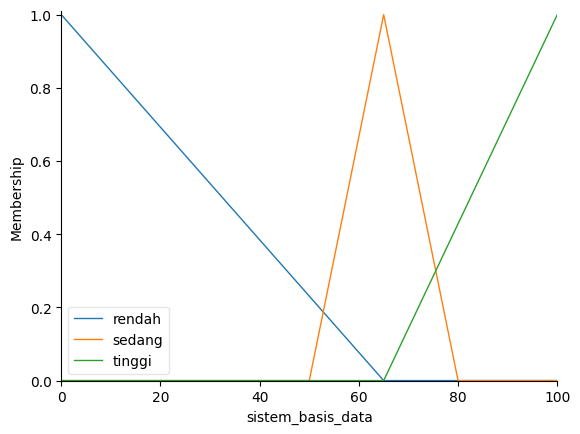

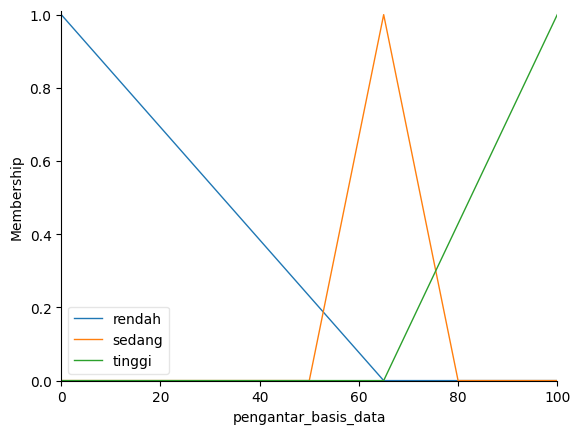

In [ ]:
algoritma_dan_pemrograman.view()
struktur_data.view()
pemrograman_berorientasi_objek.view()
matematika_diskrit.view()
statistika_dan_probabilitas.view()
data_mining.view()
komunikasi_data_dan_jaringan_komputer.view()
sistem_basis_data.view()
pengantar_basis_data.view()

In [ ]:
# Definisikan fungsi keanggotaan untuk output
peminatan['software_engineering'] = fuzz.trimf(peminatan.universe, [0, 0, 30])
peminatan['data_science'] = fuzz.trimf(peminatan.universe, [30, 50, 70])
peminatan['cyber_security'] = fuzz.trimf(peminatan.universe, [70, 100, 100])

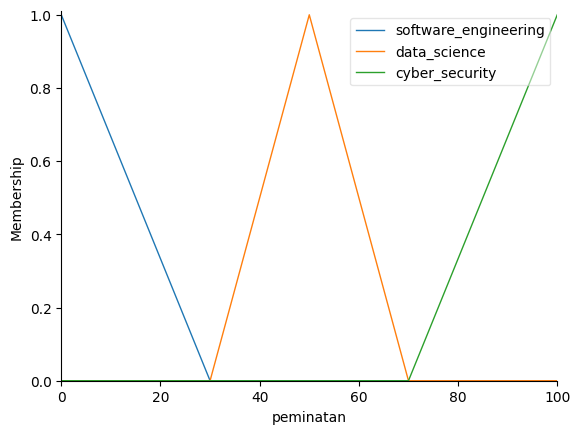

In [ ]:
peminatan.view()

In [ ]:
# Buat aturan fuzzy
rules = [
    ctrl.Rule(algoritma_dan_pemrograman['tinggi'] & struktur_data['tinggi'] & pemrograman_berorientasi_objek['tinggi'], peminatan['software_engineering']),
    ctrl.Rule(statistika_dan_probabilitas['tinggi'] & matematika_diskrit['tinggi'] & data_mining['tinggi'] & (sistem_basis_data['tinggi'] | pengantar_basis_data['tinggi']), peminatan['data_science']),
    ctrl.Rule(matematika_diskrit['tinggi'] & algoritma_dan_pemrograman['tinggi'] & komunikasi_data_dan_jaringan_komputer['tinggi'], peminatan['cyber_security'])
]

In [ ]:
# Buat sistem kontrol
peminatan_ctrl = ctrl.ControlSystem(rules)
peminatan_simulasi = ctrl.ControlSystemSimulation(peminatan_ctrl)

software engineering = algo, strukdat, pbo
data sains = statis, matdis, datmin, (sbd / pbd)
cyber security = algoritma, matdis, komdatjar

In [ ]:
# Masukkan nilai input (contoh)
peminatan_simulasi.input['algoritma_dan_pemrograman'] = 100
peminatan_simulasi.input['struktur_data'] = 80
peminatan_simulasi.input['pemrograman_berorientasi_objek'] = 90

peminatan_simulasi.input['matematika_diskrit'] = 70
peminatan_simulasi.input['statistika_dan_probabilitas'] = 90
peminatan_simulasi.input['data_mining'] = 65

peminatan_simulasi.input['komunikasi_data_dan_jaringan_komputer'] = 90

peminatan_simulasi.input['sistem_basis_data'] = 65
peminatan_simulasi.input['pengantar_basis_data'] = 65

Peminatan: 32.981366459627345


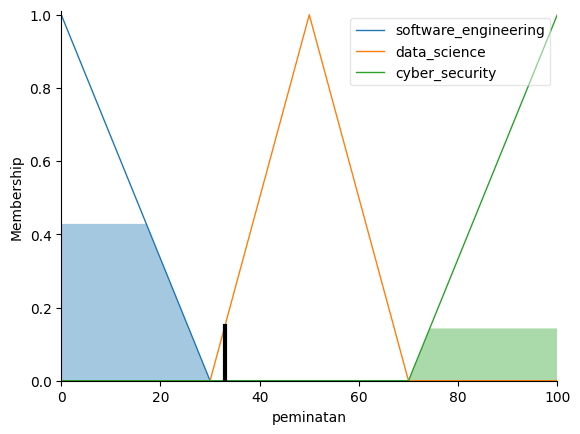

In [ ]:
# Hitung hasil
peminatan_simulasi.compute()

print(f'Peminatan: {peminatan_simulasi.output["peminatan"]}')

# Visualisasi hasil
peminatan.view(sim=peminatan_simulasi)